<a href="https://colab.research.google.com/github/AlexanderVieira/training_datascience/blob/main/DR3_TP3_knn_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Instalção de Módulos**

In [ ]:
!pip install yellowbrick

In [ ]:
!pip install fancyimpute

     |████████████████████████████████| 154 kB 7.5 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=d0ed0d2a185f0d712de1e1b5229b51c64e000c27396b2e2768de2c2162b67b4d
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=8968de85b212632045bf21ce418b2c2fe087a1030e1f06592725a611c149e681
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


#**Importação das bibliotecas básicas**

In [ ]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, learning_curve,  ShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report
from sklearn.svm import SVC
from yellowbrick.classifier import ConfusionMatrix
from fancyimpute import KNN

#**Aprendizagem baseada em instâncias - knn**

#**Carregamento da base de dados Smarket**

In [ ]:
base_smarket = pd.read_csv('/content/Smarket.csv')
base_smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


#**Exploração dos dados**

In [ ]:
base_smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [ ]:
base_smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [ ]:
base_smarket.isnull().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [ ]:
np.unique(base_smarket['Direction'], return_counts=True)

(array(['Down', 'Up'], dtype=object), array([602, 648]))

In [ ]:
base_smarket.index

RangeIndex(start=0, stop=1250, step=1)

#**Visualização dos dados**

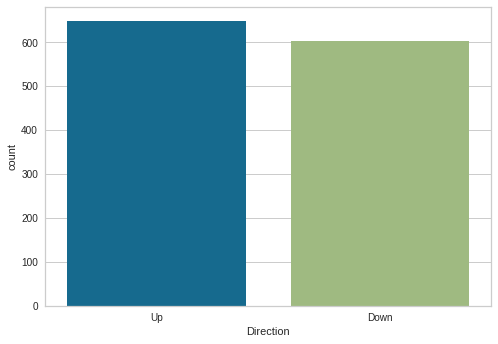

In [ ]:
sns.countplot(x = base_smarket['Direction']);

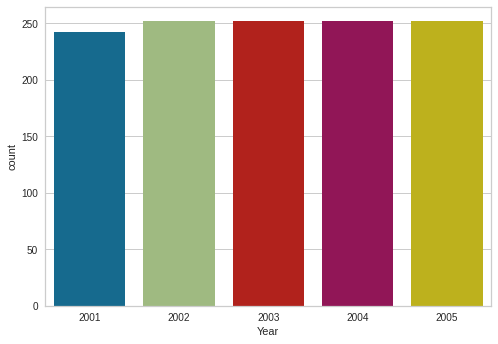

In [ ]:
sns.countplot(x = base_smarket['Year']);

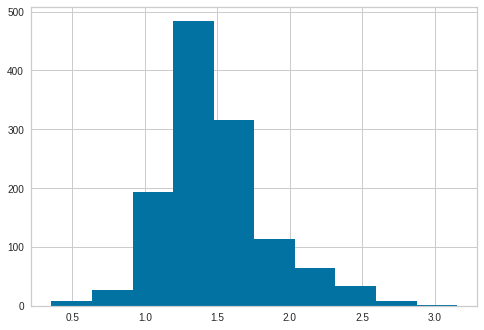

In [ ]:
plt.hist(x=base_smarket['Volume']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


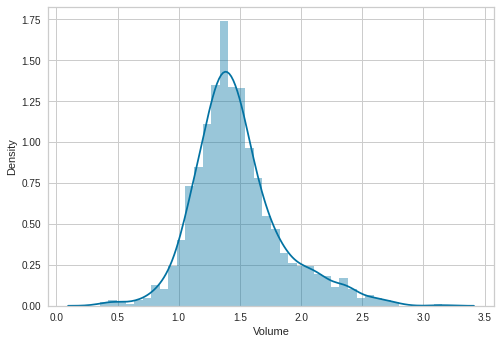

In [ ]:
sns.distplot(base_smarket['Volume'], hist = True, kde = True);

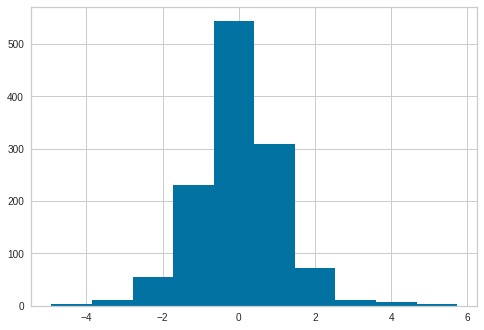

In [ ]:
plt.hist(x=base_smarket['Today']);

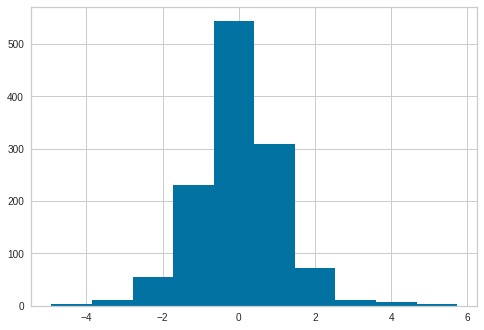

In [ ]:
plt.hist(x=base_smarket['Lag1']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


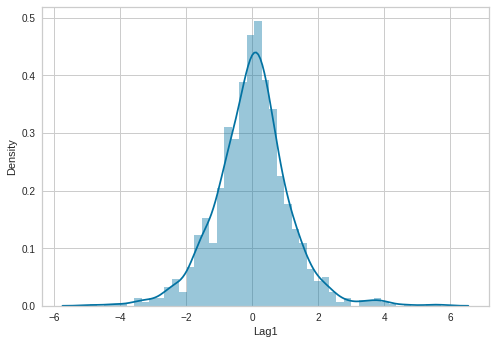

In [ ]:
sns.distplot(base_smarket['Lag1'], hist = True, kde = True);

In [ ]:
grafico = px.treemap(base_smarket, path=['Direction', 'Year'])
grafico.show()

#**Divisão entre previsores e classe - Ano: 2005**

In [ ]:
base_smarket_2005 = base_smarket[base_smarket['Year']==2005]
base_smarket_2005

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
998,2005,-0.134,0.008,-0.007,0.715,-0.431,0.78690,-0.812,Down
999,2005,-0.812,-0.134,0.008,-0.007,0.715,1.51080,-1.167,Down
1000,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.72100,-0.363,Down
1001,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.73890,0.351,Up
1002,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.56910,-0.143,Down
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [ ]:
X_base_smarket_teste = base_smarket_2005.iloc[:, 0:8].values
X_base_smarket_teste

array([[ 2.00500e+03, -1.34000e-01,  8.00000e-03, ..., -4.31000e-01,
         7.86900e-01, -8.12000e-01],
       [ 2.00500e+03, -8.12000e-01, -1.34000e-01, ...,  7.15000e-01,
         1.51080e+00, -1.16700e+00],
       [ 2.00500e+03, -1.16700e+00, -8.12000e-01, ..., -7.00000e-03,
         1.72100e+00, -3.63000e-01],
       ...,
       [ 2.00500e+03, -9.55000e-01,  4.30000e-02, ..., -2.40000e-02,
         1.54047e+00,  1.30000e-01],
       [ 2.00500e+03,  1.30000e-01, -9.55000e-01, ...,  2.52000e-01,
         1.42236e+00, -2.98000e-01],
       [ 2.00500e+03, -2.98000e-01,  1.30000e-01, ...,  4.22000e-01,
         1.38254e+00, -4.89000e-01]])

In [ ]:
y_base_smarket_teste = base_smarket_2005.iloc[:, 8].values
y_base_smarket_teste

array(['Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down',
       'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Down', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down', 'Down', 'Up',
       'Down', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Down',
       'Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up',
       'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up'

In [ ]:
base_smarket_treinamento_handled = base_smarket[base_smarket['Year']!=2005]
base_smarket_treinamento_handled

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
...,...,...,...,...,...,...,...,...,...
993,2004,0.046,0.342,0.904,0.038,-0.749,0.9561,-0.431,Down
994,2004,-0.431,0.046,0.342,0.904,0.038,0.9220,0.715,Up
995,2004,0.715,-0.431,0.046,0.342,0.904,0.9830,-0.007,Down
996,2004,-0.007,0.715,-0.431,0.046,0.342,0.9259,0.008,Up


In [ ]:
X_base_smarket_treinamento = base_smarket_treinamento_handled.iloc[:, 0:8].values
X_base_smarket_treinamento

array([[ 2.0010e+03,  3.8100e-01, -1.9200e-01, ...,  5.0100e+00,
         1.1913e+00,  9.5900e-01],
       [ 2.0010e+03,  9.5900e-01,  3.8100e-01, ..., -1.0550e+00,
         1.2965e+00,  1.0320e+00],
       [ 2.0010e+03,  1.0320e+00,  9.5900e-01, ..., -2.6240e+00,
         1.4112e+00, -6.2300e-01],
       ...,
       [ 2.0040e+03,  7.1500e-01, -4.3100e-01, ...,  9.0400e-01,
         9.8300e-01, -7.0000e-03],
       [ 2.0040e+03, -7.0000e-03,  7.1500e-01, ...,  3.4200e-01,
         9.2590e-01,  8.0000e-03],
       [ 2.0040e+03,  8.0000e-03, -7.0000e-03, ...,  4.6000e-02,
         8.2980e-01, -1.3400e-01]])

In [ ]:
y_base_smarket_treinamento = base_smarket_treinamento_handled.iloc[:, 8].values
y_base_smarket_treinamento

array(['Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down',
       'Down', 'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down',
       'Down', 'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Down', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up',
       'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Down', 'Down',
       'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up',
       'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Down',
       'Down', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 

In [ ]:
X_base_smarket = base_smarket.iloc[:, 0:8].values
#X_base_smarket

In [ ]:
y_base_smarket = base_smarket.iloc[:, 8].values
#y_base_smarket

#**Divisão da base em treinamento e teste - Ano: 2005**

In [ ]:
#X_base_smarket_treinamento, X_base_smarket_teste, y_base_smarket_treinamento, y_base_smarket_teste = train_test_split(X_base_smarket, y_base_smarket, test_size = 0.30, random_state = 0)

In [ ]:
X_base_smarket_treinamento.shape, y_base_smarket_treinamento.shape

((998, 8), (998,))

In [ ]:
X_base_smarket_teste.shape, y_base_smarket_teste.shape

((252, 8), (252,))

#**Salvar as variáveis**

In [ ]:
with open('smarket.pkl', mode = 'wb') as f:
  pickle.dump([X_base_smarket_treinamento, y_base_smarket_treinamento, X_base_smarket_teste, y_base_smarket_teste], f)

#**Leitura das variáveis**

In [ ]:
with open('smarket.pkl', 'rb') as f:  
  X_base_smarket_treinamento, y_base_smarket_treinamento, X_base_smarket_teste, y_base_smarket_teste = pickle.load(f)

In [ ]:
X_base_smarket_treinamento.shape, y_base_smarket_treinamento.shape

((998, 8), (998,))

In [ ]:
X_base_smarket_teste.shape, y_base_smarket_teste.shape

((252, 8), (252,))

#**Criação do modelo**

In [ ]:
knn_smarket = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=18, p=2, weights='uniform')
knn_smarket.fit(X_base_smarket_treinamento, y_base_smarket_treinamento)

KNeighborsClassifier(n_neighbors=18)

#**Predição**

In [ ]:
previsoes = knn_smarket.predict(X_base_smarket_teste)
previsoes

array(['Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down',
       'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up',
       'Up', 'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Down', 'Down', 'Down',
       'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Down',
       'Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up',
       'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Up', 'Down', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Down',
       'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 

In [ ]:
y_base_smarket_teste

array(['Down', 'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down',
       'Up', 'Up', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up',
       'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Down', 'Up', 'Up', 'Up', 'Down', 'Down', 'Up',
       'Down', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down', 'Down', 'Up',
       'Down', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up',
       'Down', 'Up', 'Up', 'Down', 'Down', 'Down', 'Up', 'Up', 'Down',
       'Up', 'Down', 'Up', 'Down', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down', 'Up',
       'Up', 'Down', 'Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up', 'Up',
       'Up', 'Up', 'Down', 'Down', 'Up', 'Down', 'Down', 'Down', 'Up',
       'Down', 'Down', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up'

In [ ]:
accuracy_score(y_base_smarket_teste, previsoes)

0.8928571428571429

##**1. Apresente a matriz de confusão resultante da aplicação do modelo KNN na base de testes.**

#**Visualização matriz de confusão**

0.8928571428571429

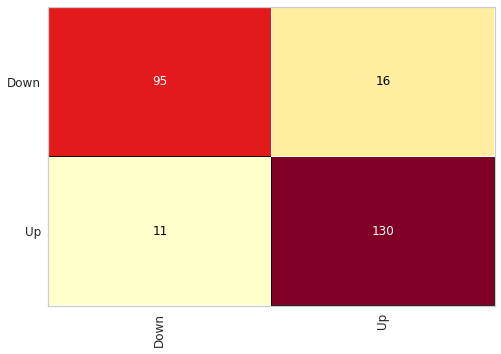

In [ ]:
cm = ConfusionMatrix(knn_smarket)
cm.fit(X_base_smarket_treinamento, y_base_smarket_treinamento)
cm.score(X_base_smarket_teste, y_base_smarket_teste)

##**2. Apresente a métrica acurácia resultante da aplicação do modelo KNN na base de testes.**
##**3. Apresente a métrica precision resultante da aplicação do modelo KNN na base de testes.**
##**4. Apresente a métrica recall resultante da aplicação do modelo KNN na base de testes.**

#**Relatório de Métricas**

In [ ]:
print(classification_report(y_base_smarket_teste, previsoes))

              precision    recall  f1-score   support

        Down       0.90      0.86      0.88       111
          Up       0.89      0.92      0.91       141

    accuracy                           0.89       252
   macro avg       0.89      0.89      0.89       252
weighted avg       0.89      0.89      0.89       252



#**Função para exibir gráfico das Curvas de Aprendizagem.**

In [ ]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
  
  if axes is None:
    _, axes = plt.subplots(1, 3, figsize=(20, 5))  

  axes[0].set_title(title)
  if ylim is not None:
    axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    
    return plt

#**Vizualização das Curvas de Aprendizagem**

In [ ]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'metric': ['minkowski','euclidean']}
classifier = KNeighborsClassifier()
modelCV = GridSearchCV(classifier, params, cv=5)
modelCV.fit(X_base_smarket_treinamento,y_base_smarket_treinamento)
modelCV.best_params_

# Guardando o melhor modelo encontrado.
best_model = modelCV.best_estimator_
# Inspecionando o melhor modelo encontrado
print(best_model.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 18, 'p': 2, 'weights': 'uniform'}


In [ ]:
K = best_model.get_params()['n_neighbors']
K

18

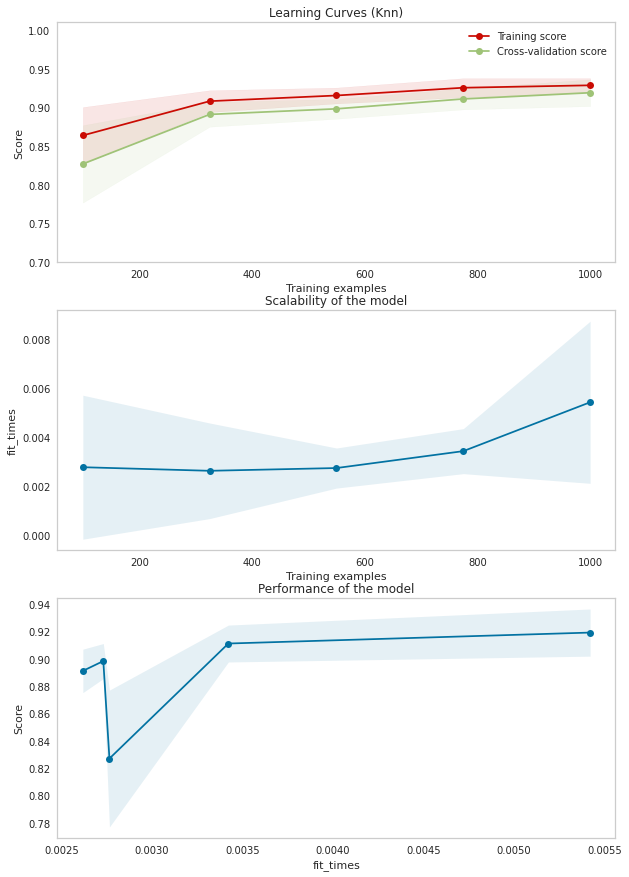

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Knn is more expensive so we do a lower number of Knn iterations:
title = "Learning Curves (Knn)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
knn_smarket = KNeighborsClassifier(n_neighbors=K)
plot_learning_curve(
    knn_smarket, title, X_base_smarket, y_base_smarket, axes=axes, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)
plt.show()

# SVC is more expensive so we do a lower number of CV iterations:
#title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
#cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
#plot_learning_curve(
#    estimator, title, X_base_smarket, y_base_smarket, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
#)

#plt.show()

##**5. Carregue os dados em um dataframe. Absenteeism**

In [ ]:
base_absenteeism = pd.read_csv('/content/Absenteeism_at_work.csv', delimiter=';')
base_absenteeism

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


#**Exploração dos dados**

In [ ]:
base_absenteeism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [ ]:
base_absenteeism.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [ ]:
base_absenteeism.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [ ]:
base_absenteeism.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [ ]:
base_absenteeism.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
base_absenteeism.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

##**Definindo campos tipo categóricos**

In [ ]:
base_absenteeism['ID'] = base_absenteeism['ID'].astype('category')

In [ ]:
base_absenteeism['Reason for absence'] = base_absenteeism['Reason for absence'].replace(0,20)

In [ ]:
base_absenteeism['Reason for absence'] = base_absenteeism['Reason for absence'].astype('category')

In [ ]:
base_absenteeism['Month of absence'] = base_absenteeism['Month of absence'].replace(0,np.nan)
base_absenteeism['Month of absence'] = base_absenteeism['Month of absence'].astype('category')

In [ ]:
base_absenteeism['Day of the week'] = base_absenteeism['Day of the week'].astype('category')
base_absenteeism['Seasons'] = base_absenteeism['Seasons'].astype('category')
base_absenteeism['Disciplinary failure'] = base_absenteeism['Disciplinary failure'].astype('category')
base_absenteeism['Education'] = base_absenteeism['Education'].astype('category')
base_absenteeism['Son'] = base_absenteeism['Son'].astype('category')
base_absenteeism['Social drinker'] = base_absenteeism['Social drinker'].astype('category')
base_absenteeism['Social smoker'] = base_absenteeism['Social smoker'].astype('category')
base_absenteeism['Pet'] = base_absenteeism['Pet'].astype('category')

In [ ]:
base_absenteeism

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7.0,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,20,7.0,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7.0,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7.0,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7.0,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7.0,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7.0,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,20,NaN,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,20,NaN,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [ ]:
dataset = base_absenteeism.copy()

##**Definindo variáveis contínuas e categóricas**

In [ ]:
continuous_variables = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_variables = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

###**Definindo percentual de campos nulos**

In [ ]:
missing_values = pd.DataFrame(dataset.isnull().sum())

In [ ]:
missing_values = missing_values.reset_index()

In [ ]:
missing_values = missing_values.rename(columns = {'index': 'Variables', 0: 'Missing_perc'})

In [ ]:
missing_values['Missing_perc'] = (missing_values['Missing_perc']/len(dataset))*100

In [ ]:
missing_values = missing_values.sort_values('Missing_perc', ascending = False).reset_index(drop = True)

In [ ]:
missing_values

,Variables,Missing_perc
0,Month of absence,0.405405
1,ID,0.000000
2,Disciplinary failure,0.000000
3,Body mass index,0.000000
4,Height,0.000000
5,Weight,0.000000
6,Pet,0.000000
7,Social smoker,0.000000
8,Social drinker,0.000000
9,Son,0.000000


##**Salvando dataframe**

In [ ]:
missing_values.to_csv("Missing_perc.csv", index = False)

In [ ]:
df = dataset.copy()

##**6. Identifique a existência de valores ausentes e outliers e defina o que será feito em cada um casos.**

##**Tratamento de dados faltantes**

In [ ]:
print(df['Body mass index'].iloc[1])

31


In [ ]:
df['Body mass index'].iloc[1] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
df['Body mass index'].iloc[1]

Imputing row 1/740 with 0 missing, elapsed time: 0.373
Imputing row 101/740 with 0 missing, elapsed time: 0.375
Imputing row 201/740 with 0 missing, elapsed time: 0.376
Imputing row 301/740 with 0 missing, elapsed time: 0.377
Imputing row 401/740 with 0 missing, elapsed time: 0.377
Imputing row 501/740 with 0 missing, elapsed time: 0.378
Imputing row 601/740 with 0 missing, elapsed time: 0.379
Imputing row 701/740 with 0 missing, elapsed time: 0.380


31.00000068333565

In [ ]:
for i in categorical_variables:
    df.loc[:,i] = df.loc[:,i].round()    
    df.loc[:,i] = df.loc[:,i].astype('category')

In [ ]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

##**Visualização dos dados**

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



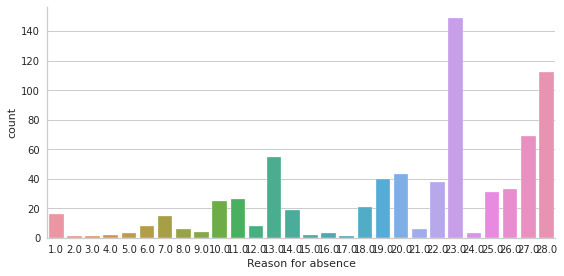

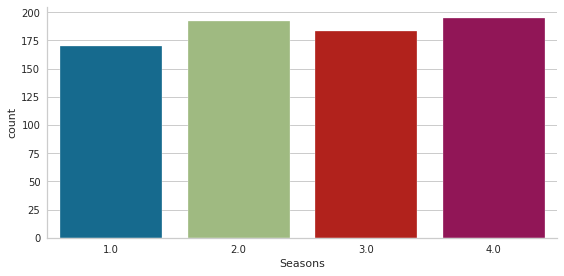

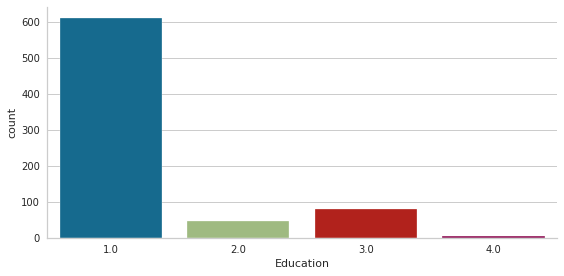

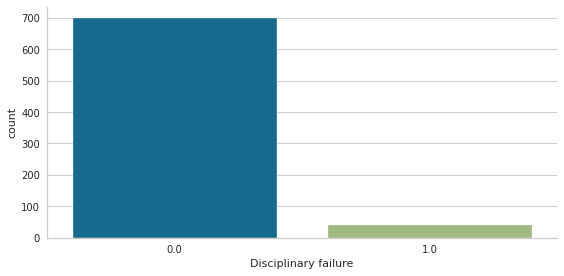

In [ ]:
sns.set_style("whitegrid");
sns.catplot(data=df, x='Reason for absence', kind= 'count',height=4,aspect=2);
sns.catplot(data=df, x='Seasons', kind= 'count',height=4,aspect=2);
sns.catplot(data=df, x='Education', kind= 'count',height=4,aspect=2);
sns.catplot(data=df, x='Disciplinary failure', kind= 'count',height=4,aspect=2);

Text(0.5, 1.0, 'Weight Distribution')

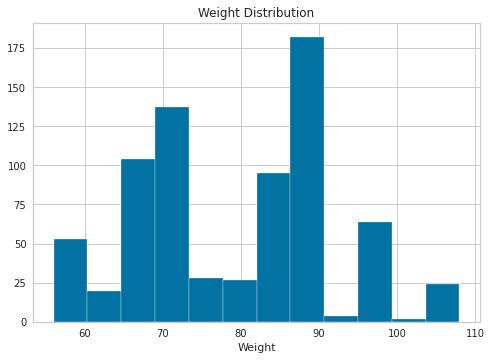

In [ ]:
plt.hist(data=df, x='Weight', bins='auto', label='Weight')
plt.xlabel('Weight')
plt.title("Weight Distribution")

Text(0.5, 1.0, 'Age Distribution')

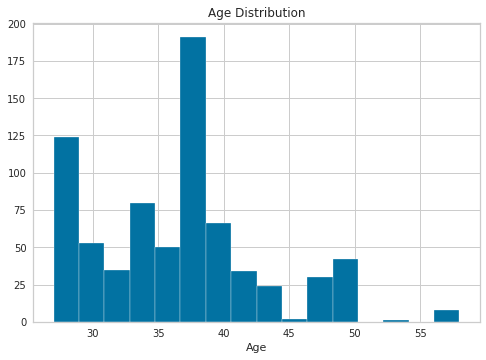

In [ ]:
plt.hist(data=df, x='Age', bins='auto', label='Age')
plt.xlabel('Age')
plt.title("Age Distribution")

Text(0, 0.5, 'Count of bikes')

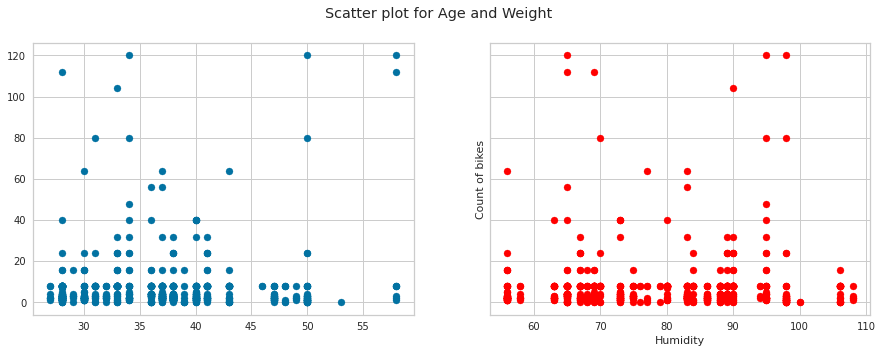

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=True)
axs[0].scatter(data=df, x='Age', y='Absenteeism time in hours')
axs[1].scatter(data=df, x='Weight', y='Absenteeism time in hours', color = 'red')
fig.suptitle('Scatter plot for Age and Weight')
plt.xlabel("Humidity")
plt.ylabel("Count of bikes")

##**Tratamento de outliers**

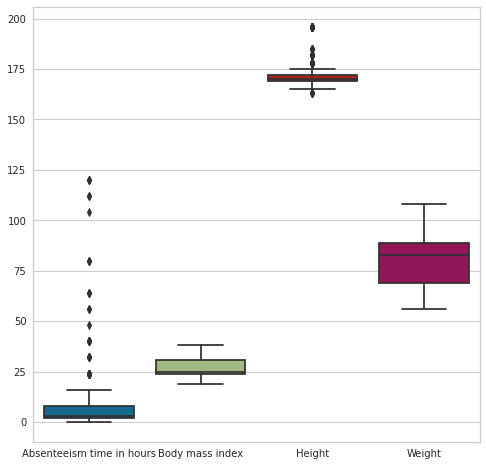

In [ ]:
sns.boxplot(data=df[['Absenteeism time in hours','Body mass index','Height','Weight']])
fig=plt.gcf()
fig.set_size_inches(8,8)

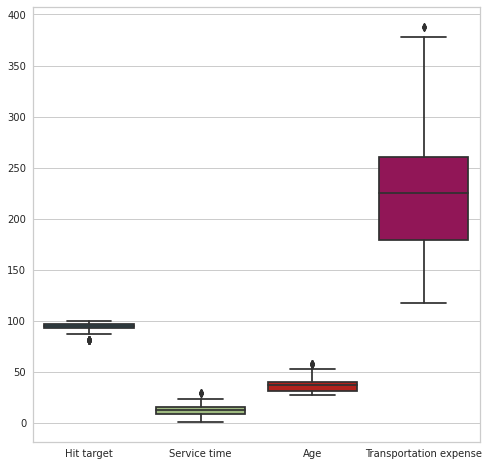

In [ ]:
sns.boxplot(data=df[['Hit target','Service time','Age','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

##**Calculando quartis, interquartile e atualização dos outliers**

In [ ]:
for i in continuous_variables:    
    q75, q25 = np.percentile(df[i], [75,25])        
    iqr = q75 - q25   
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)   
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan

In [ ]:
df = pd.DataFrame(KNN(k = 3).fit_transform(df), columns = df.columns)
df.isnull().sum()

Imputing row 1/740 with 0 missing, elapsed time: 0.376
Imputing row 101/740 with 1 missing, elapsed time: 0.385
Imputing row 201/740 with 0 missing, elapsed time: 0.387
Imputing row 301/740 with 0 missing, elapsed time: 0.390
Imputing row 401/740 with 0 missing, elapsed time: 0.392
Imputing row 501/740 with 0 missing, elapsed time: 0.393
Imputing row 601/740 with 0 missing, elapsed time: 0.411
Imputing row 701/740 with 0 missing, elapsed time: 0.417


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

##**Outliers removidos**

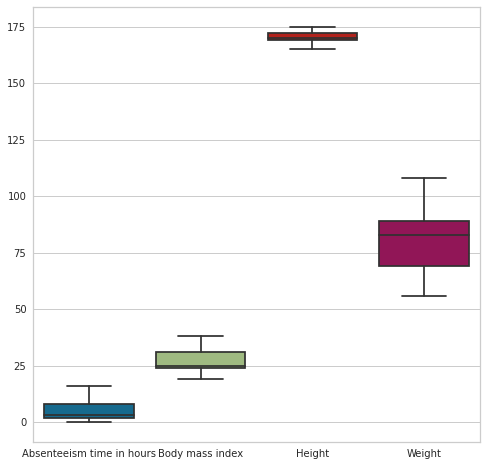

In [ ]:
sns.boxplot(data=df[['Absenteeism time in hours','Body mass index','Height','Weight']])
fig=plt.gcf()
fig.set_size_inches(8,8)

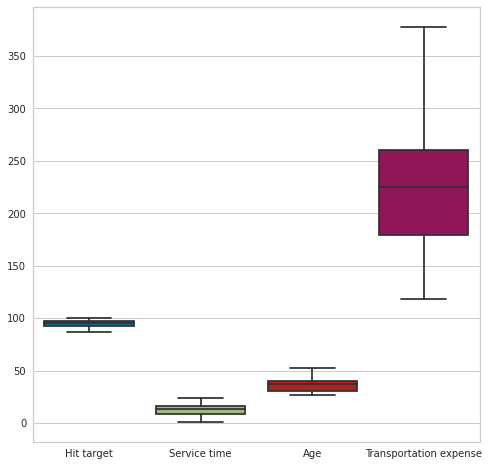

In [ ]:
sns.boxplot(data=df[['Hit target','Service time','Age','Transportation expense']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [ ]:
df_continuous = df.loc[:,continuous_variables]

##**Correlação**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[]

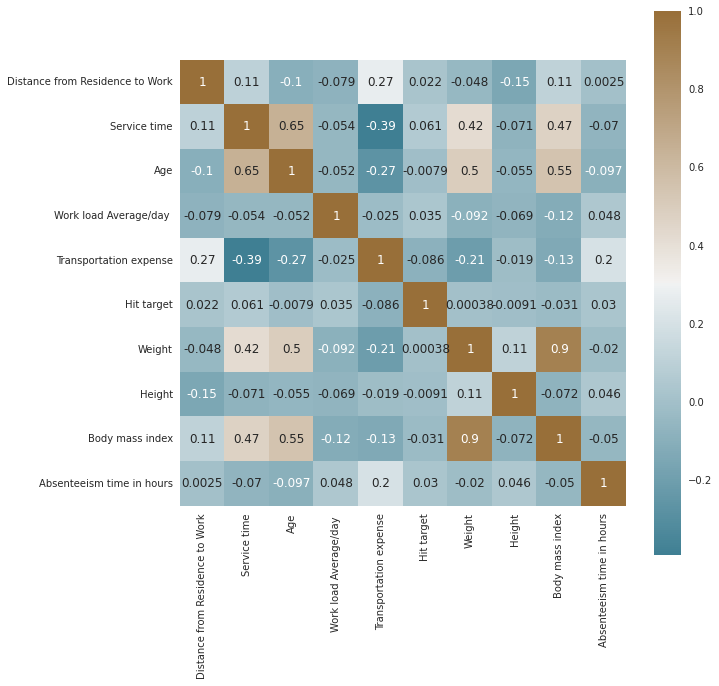

In [ ]:
fig1, ax = plt.subplots(figsize=(10, 10))
correlation = df_continuous.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [ ]:
df = df.drop('Weight', axis = 1)

In [ ]:
continuous_variables.remove('Weight')

In [ ]:
continuous_variables

['Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Transportation expense',
 'Hit target',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

##**Visualização - distribuição por variáveis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



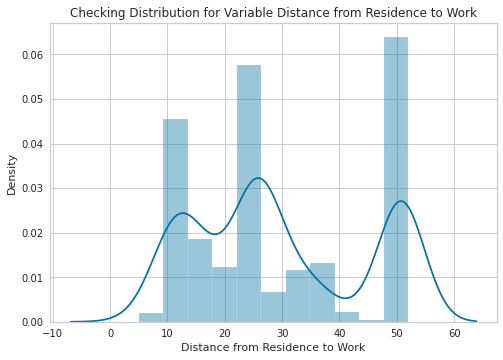

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



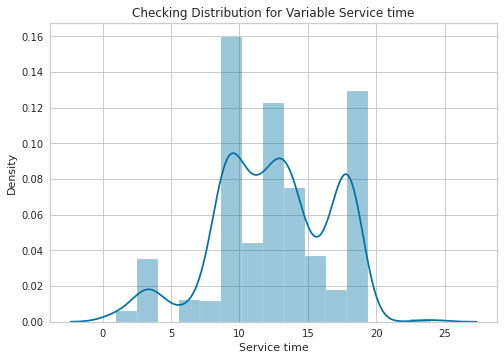

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



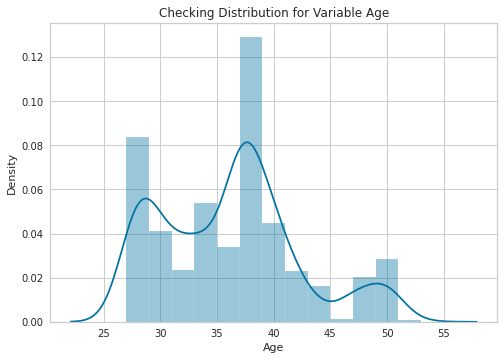

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



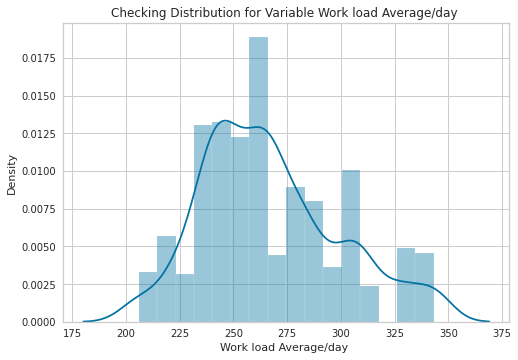

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



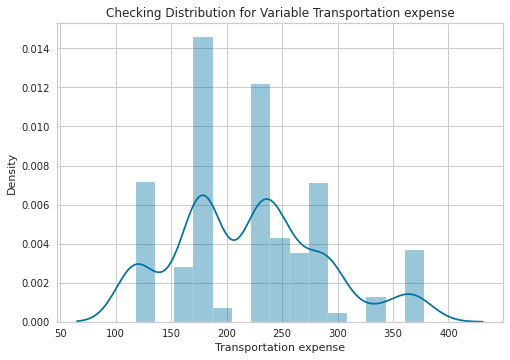

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



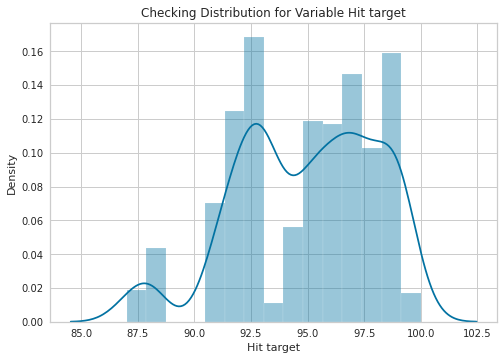

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



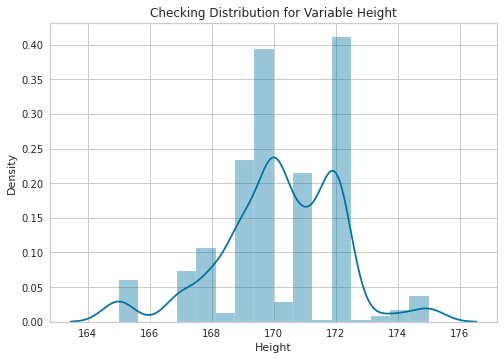

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



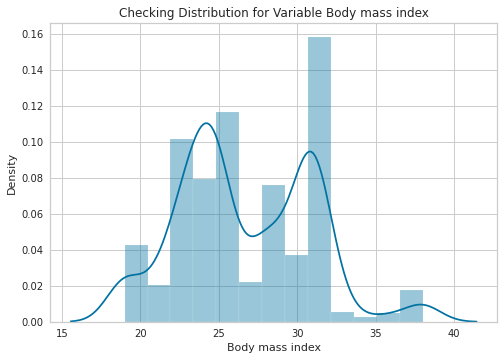

In [ ]:
for i in continuous_variables:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

##**Normalização**

In [ ]:
for i in continuous_variables:
    if i == 'Absenteeism time in hours':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

In [ ]:
df = pd.get_dummies(data = df, columns = categorical_variables)

In [ ]:
df1 = df.copy()

In [ ]:
df.shape

(740, 115)

In [ ]:
df.head(1)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Height,Body mass index,Absenteeism time in hours,ID_1.0,...,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0,Son_0.0,Son_1.0,Son_2.0,Son_3.0,Son_4.0
0,0.657692,0.659574,0.521739,0.230769,0.244925,0.769231,0.699999,0.578947,4.0,0,...,1,0,0,0,0,0,0,1,0,0


##**Divisão entre previsores e variável alvo**

In [ ]:
X = df.iloc[:, df.columns != 'Absenteeism time in hours']
y = np.where(df.iloc[:, 8] > df.iloc[:, 8].median(), 'absent', 'not absent')

##**Divisão da base em treinamento e teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=1)

In [ ]:
X_train.shape, X_test.shape

((518, 114), (222, 114))

In [ ]:
y_train.shape, y_test.shape

((518,), (222,))

##**7. Utilize uma árvore de decisão para prever, a partir dos dados fornecidos, a propensão de um funcionário a se ausentar do trabalho.** 

##**Criação do modelo, treinamento e predição**

In [ ]:
model = DecisionTreeClassifier(max_depth=5, random_state=10).fit(X_train,y_train)
predictions = model.predict(X_test)

In [ ]:
df2 = pd.DataFrame({'actual': y_test, 'pred': predictions})
print(df2.head(10))

       actual        pred
0      absent      absent
1  not absent      absent
2      absent  not absent
3      absent      absent
4      absent  not absent
5  not absent      absent
6      absent  not absent
7  not absent      absent
8      absent  not absent
9  not absent  not absent


In [ ]:
def convert_actual(param): 
  y = np.where('absent' == param, 1, 0)
  return y

In [ ]:
def convert_pred(param):
  y_pred = np.where('absent' == param, 1, 0)
  return y_pred

In [ ]:
actual = df2.actual.apply(convert_actual)

In [ ]:
pred = df2.pred.apply(convert_pred)

In [ ]:
df3 = pd.DataFrame({'actual': actual, 'pred': pred})
print(df3.head(10))

   actual  pred
0       1     1
1       0     1
2       1     0
3       1     1
4       1     0
5       0     1
6       1     0
7       0     1
8       1     0
9       0     0


##**8. Apresente a acurácia de sua árvore de decisão.**

##**Métricas**

In [ ]:
def RMSE(y_actual,y_predicted):
    rmse = np.sqrt(mean_squared_error(y_actual,y_predicted))
    return rmse

In [ ]:
print("Root Mean Squared Error: " + str(RMSE(actual, pred)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(actual, pred)))
print("Accuracy: " + str(accuracy_score(y_test, predictions)))

Root Mean Squared Error: 0.4793012932694108
R^2 Score(coefficient of determination) = 0.07628294036061056
Accuracy: 0.7702702702702703


In [ ]:
accuracy_score(y_test, predictions)

0.7702702702702703

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



0.7702702702702703

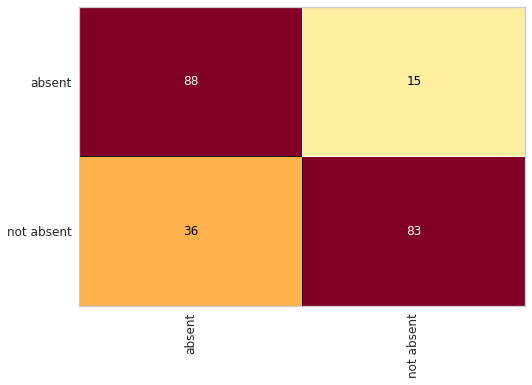

In [ ]:
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.71      0.85      0.78       103
  not absent       0.85      0.70      0.76       119

    accuracy                           0.77       222
   macro avg       0.78      0.78      0.77       222
weighted avg       0.78      0.77      0.77       222



In [ ]:
predictor_attributes = []
for column in df.columns[1:]:
    predictor_attributes.append(column)

In [ ]:
predictor_attributes

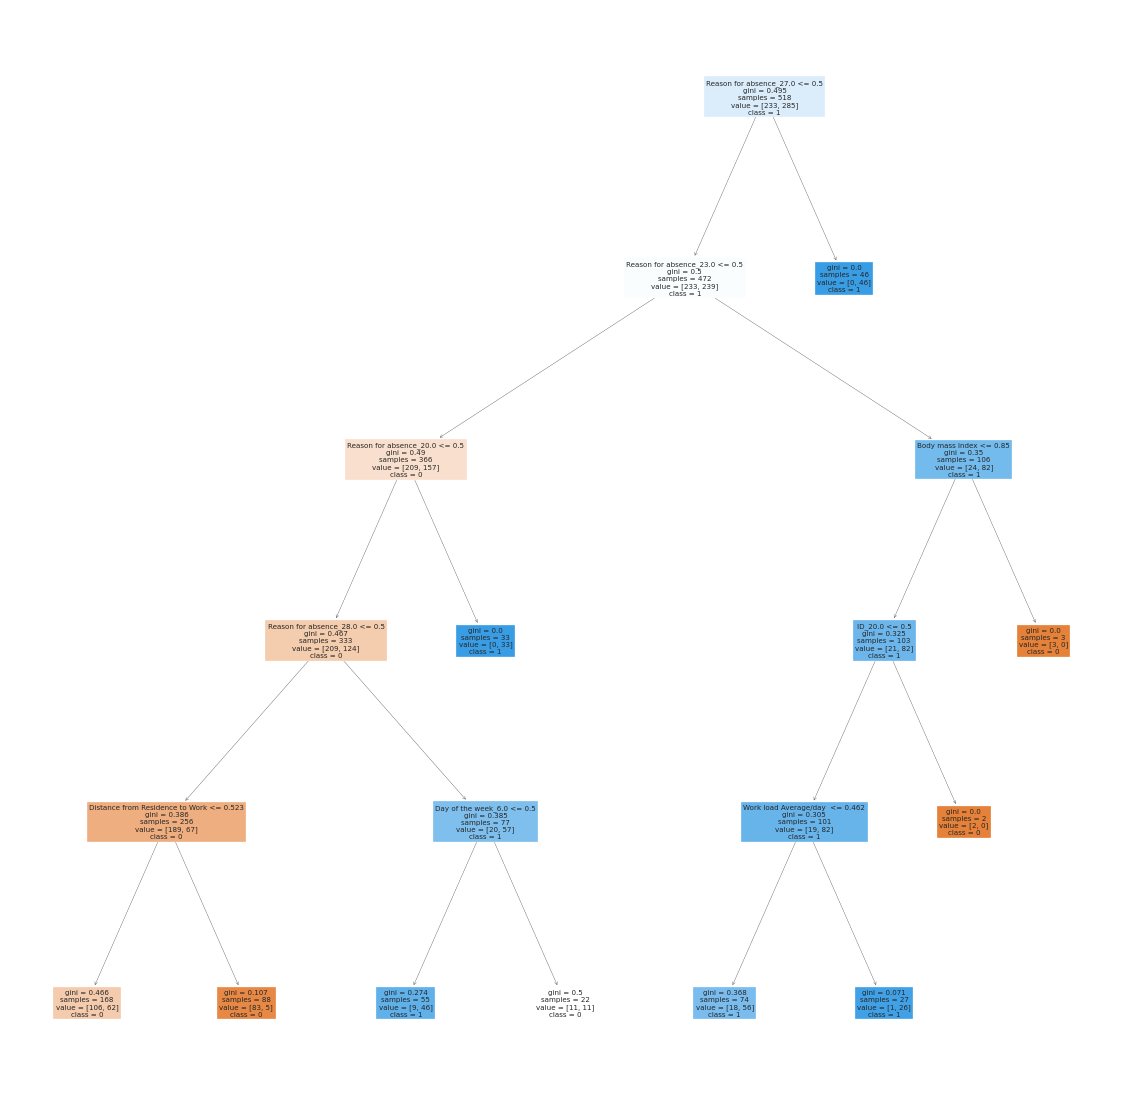

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
tree.plot_tree(model, feature_names=predictor_attributes, class_names=['0','1'], filled=True);
fig.savefig('absenteeism.png')